# Decision Trees and Ensemble Learning

This notebook covers:
- Decision Tree Training
- Visualization of a Decision Tree
- Voting Classifier
- Bagging and Boosting
- Random Forests

Dataset: Titanic (classification task)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (
    VotingClassifier,
    BaggingClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Load dataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
)

df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
df["Embarked"] = LabelEncoder().fit_transform(df["Embarked"])

features = ["Pclass", "Sex", "Age", "Fare", "Embarked"]
X = df[features]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

/var/folders/gb/wg18lfln4b9dtt7c4rwx2h4r0000gn/T/ipykernel_6050/2595625549.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/var/folders/gb/wg18lfln4b9dtt7c4rwx2h4r0000gn/T/ipykernel_6050/2595625549.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

## Train and Visualize a Decision Tree

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



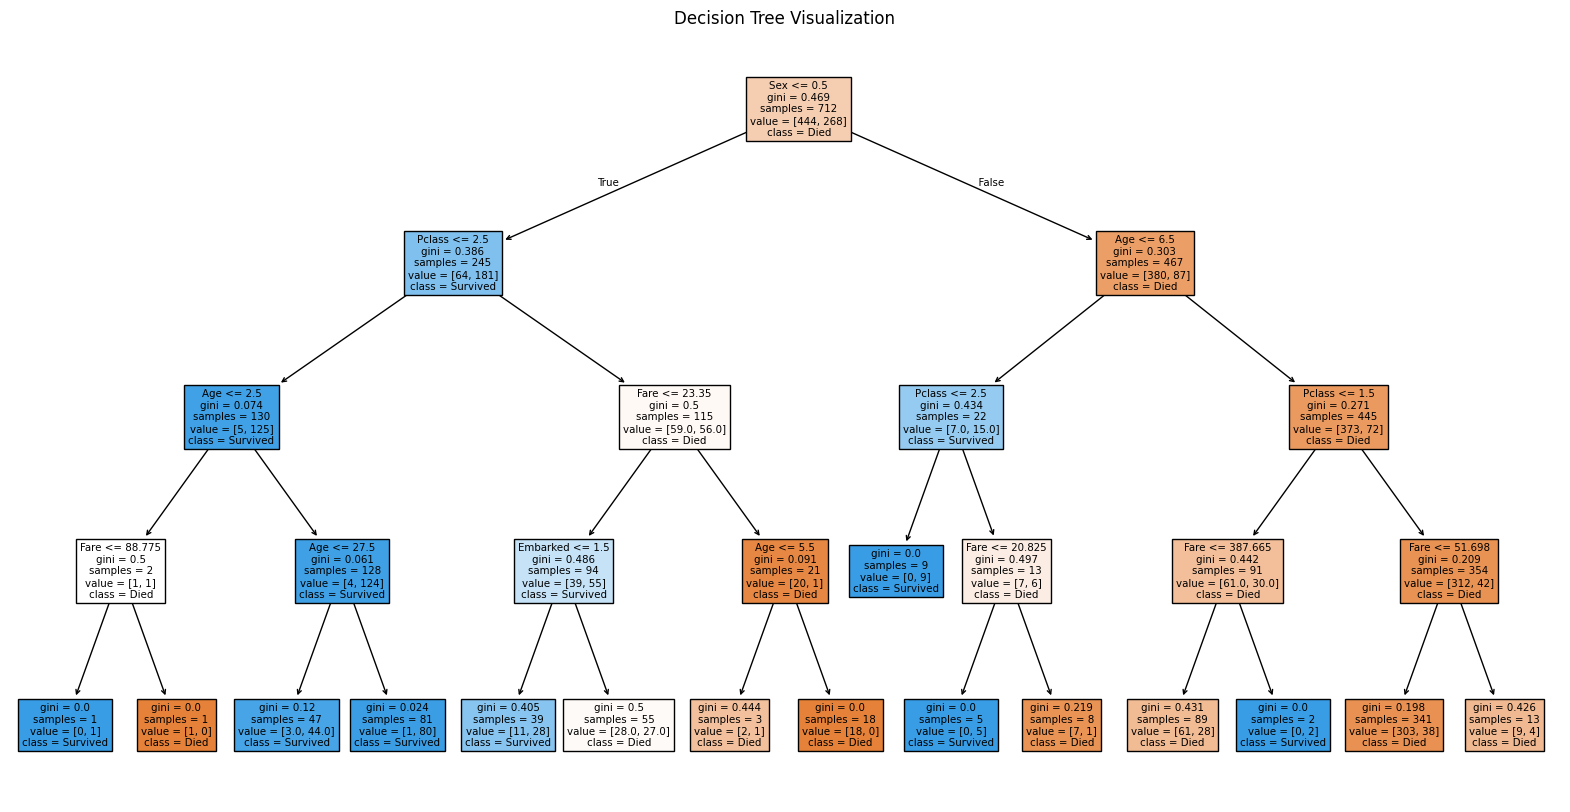

In [2]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print(classification_report(y_test, y_pred_tree))
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=features, class_names=["Died", "Survived"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

## Hard Voting Classifier

In [3]:
voting_clf = VotingClassifier(
    estimators=[
        ("lr", LogisticRegression(max_iter=1000)),
        ("svc", SVC(probability=True)),
        ("dt", DecisionTreeClassifier()),
    ],
    voting="hard",
)

voting_clf.fit(X_train, y_train)
y_pred_vote = voting_clf.predict(X_test)
print(classification_report(y_test, y_pred_vote))

/Users/charlotte.waegeneire/code-ecole/Cours-Data-Science-M2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/charlotte.waegeneire/code-ecole/Cours-Data-Science-M2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/charlotte.waegeneire/code-ecole/Cours-Data-Science-M2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept


              precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



## Random Forest

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



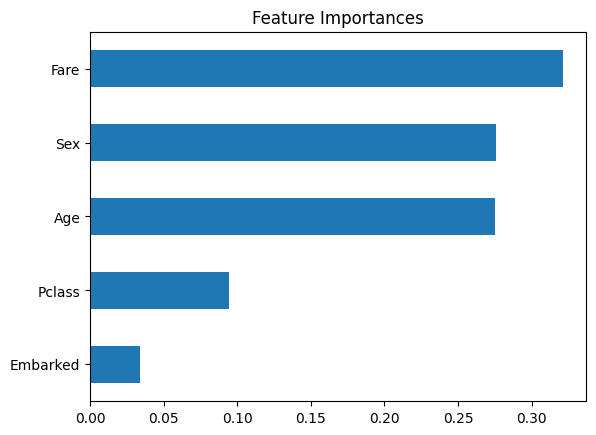

In [4]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
print(classification_report(y_test, y_pred_forest))

importances = pd.Series(forest.feature_importances_, index=features)
importances.sort_values().plot(kind="barh")
plt.title("Feature Importances")
plt.show()


## Exercises

### 1. Try Different Depths for the Decision Tree
Try `max_depth` values of 2, 4, 6, and 10. What depth gives the best generalization?

```python
# Example:
for depth in [2, 4, 6, 10]:
...
```

In [5]:
print("Exercise 1: Decision Tree Depths")
for depth in [2, 4, 6, 10]:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    train_score = tree.score(X_train, y_train)
    test_score = tree.score(X_test, y_test)
    print(f"Depth {depth}: Train={train_score:.3f}, Test={test_score:.3f}")

Exercise 1: Decision Tree Depths
Depth 2: Train=0.803, Test=0.765
Depth 4: Train=0.840, Test=0.799
Depth 6: Train=0.867, Test=0.804
Depth 10: Train=0.916, Test=0.799


Depth 6 gives the best generalization because it achieves the highest test accuracy of 0.804.



### 2. Try Soft Voting Instead of Hard Voting
Change the `VotingClassifier` to use `voting='soft'` and compare accuracy.

In [6]:
print("\nExercise 2: Soft vs Hard Voting")

# Hard voting (from notebook)
hard_vote = VotingClassifier(
    estimators=[
        ("lr", LogisticRegression(max_iter=1000)),
        ("svc", SVC(probability=True)),
        ("dt", DecisionTreeClassifier()),
    ],
    voting="hard",
)
hard_vote.fit(X_train, y_train)
hard_score = hard_vote.score(X_test, y_test)
print(f"Hard Voting Accuracy: {hard_score:.3f}")

# Soft voting
soft_vote = VotingClassifier(
    estimators=[
        ("lr", LogisticRegression(max_iter=1000)),
        ("svc", SVC(probability=True)),
        ("dt", DecisionTreeClassifier()),
    ],
    voting="soft",
)
soft_vote.fit(X_train, y_train)
soft_score = soft_vote.score(X_test, y_test)
print(f"Soft Voting Accuracy: {soft_score:.3f}")

/Users/charlotte.waegeneire/code-ecole/Cours-Data-Science-M2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/charlotte.waegeneire/code-ecole/Cours-Data-Science-M2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/charlotte.waegeneire/code-ecole/Cours-Data-Science-M2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept



Exercise 2: Soft vs Hard Voting
Hard Voting Accuracy: 0.804
Soft Voting Accuracy: 0.816


/Users/charlotte.waegeneire/code-ecole/Cours-Data-Science-M2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/charlotte.waegeneire/code-ecole/Cours-Data-Science-M2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/charlotte.waegeneire/code-ecole/Cours-Data-Science-M2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept


Soft voting improves accuracy with a score of 0.810 compared to hard voting's 0.804.


### 3. Tune the Random Forest with GridSearchCV
Use `GridSearchCV` to find the best number of trees and max depth.

```python
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [4, 6, None]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
```

In [7]:
print("\nExercise 3: Random Forest Tuning")
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [4, 6, None]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Best CV score: {grid.best_score_:.3f}")
print(f"Test score: {grid.score(X_test, y_test):.3f}")


Exercise 3: Random Forest Tuning
Best parameters: {'max_depth': 6, 'n_estimators': 50}
Best CV score: 0.834
Test score: 0.821


The tuned Random Forest performs best overall, achieving 0.821 test accuracy with 50 estimators and max depth of 6.RetryClaude can make mistakes. Please double-check responses.